Продакт-менеджер попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут.

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

In [1]:
import pandas as pd

import requests
from urllib.parse import urlencode

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig' 


final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']


download_response = requests.get(download_url)
customers = pd.read_csv(download_url)
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg' 


final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']


download_response = requests.get(download_url)
orders = pd.read_csv(download_url)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw' 


final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']


download_response = requests.get(download_url)
items = pd.read_csv(download_url)
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
customers.shape

(99441, 5)

In [6]:
items.shape

(112650, 7)

In [7]:
orders.shape

(99441, 8)

In [8]:
#======Задача 1=======

In [9]:
orders.groupby('order_status').order_approved_at.count() # считаем кол-во заказов с разными статусами, чтобы изучить данные

order_status
approved           2
canceled         484
created            0
delivered      96464
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_approved_at, dtype: int64

In [10]:
orders.order_approved_at.isna().sum() # вероятно, если дата подтверждения отсутсвует, то покупка не была оплачена, и, соответственно, совершена. таких заказов 160

160

In [11]:
customers.groupby('customer_unique_id', as_index = False).agg({'customer_id':'count'}).sort_values('customer_id', ascending = False)
# из этой таблицы видно, что на каждого уникального пользователя может приходиться несколько customer_id. Поэтому, для дальнейшего
# подсчёта уникальных пользователей необходимо добавить колонку customer_unique_id в датафрейм orders.

,customer_unique_id,customer_id
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,1
32507,5657596addb4d7b07b32cd330614bdf8,1
32506,5656eb169546146caeab56c3ffc3d268,1
32505,5656a8fabc8629ff96b2bc14f8c09a27,1


In [12]:
orders = orders.merge(customers[['customer_id', 'customer_unique_id']], on = 'customer_id') # добавляем к датафрейму с заказами колонку с уникальным id пользователя

In [13]:
orders.dtypes # колонки с временем представлены как object, необходимо перевести их во временной тип

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
customer_unique_id               object
dtype: object

In [14]:
orders.order_purchase_timestamp = pd.to_datetime(orders['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S') # переводим строковые колонки во время
orders.order_approved_at = pd.to_datetime(orders['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders.order_delivered_carrier_date = pd.to_datetime(orders['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders.order_delivered_customer_date = pd.to_datetime(orders['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders.order_estimated_delivery_date = pd.to_datetime(orders['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [15]:
purchase = orders.dropna(subset=['order_approved_at']) # удаляем строки с неподтверждённой оплатой. сохраняем отдельный датасет с покупками

In [16]:
purchase.order_status.value_counts() 

delivered      96464
shipped         1107
unavailable      609
canceled         484
invoiced         314
processing       301
approved           2
Name: order_status, dtype: int64

Заказы со статусом created (неоплаченные) автоматически удалились из датафрейма, т.к. они только что созданы и пока не являются покупкой. Однако логично предположить, что заказы со статусом canceled и, вероятно, unavailable также нельзя считать покупкой, т.к. это может означать отсутствие товара на складе, невозможность доставки и прочие проблемы, делающие покупку невозможной.

In [17]:
purchase = purchase.query('order_status in ("delivered", "shipped", "invoiced", "processing", "approved")') #оставляем только статусы заказов, которые отражают факт покупки

In [18]:
one_time_customers = purchase.groupby('customer_unique_id', as_index=False).agg({'order_id' : 'count'})\
.query('order_id == 1').shape[0] 
one_time_customers_message = 'Кол-во пользователей, которые совершили покупку только один раз - {} человек.'
print(one_time_customers_message.format(one_time_customers))
# Задание 1: кол-во пользователей, которые совершили покупку только один раз - 92087.

Кол-во пользователей, которые совершили покупку только один раз - 92087 человек.


======Задача 2======= 

Под недоставленными заказами стоит понимать, вероятно, отменённые и недоступные. Заказы со статусом created нельзя считать недоставленными, т.к. они только что созданы, и их категория будет определена только в будущем (станут ли они покупкой или их, например, отменят).
Соответственно, у нас 2 причины, по которым заказы не доставляются: отмена покупки и недоступность заказа.

In [20]:
no_purchase = orders.query('order_status in ("canceled", "unavailable")') # отберём заказы, которые не были доставлены.

In [21]:
no_purchase.order_approved_at.isna().sum() # из этих заказов 141 даже не был оплачен

141

In [22]:
no_purchase['Year_Mounth'] = no_purchase.order_purchase_timestamp.dt.strftime('%Y-%m')# создание колонки с годом и месяцем заказа

C:\Users\Vaanry\AppData\Local\Temp\ipykernel_10992\3875415370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_purchase['Year_Mounth'] = no_purchase.order_purchase_timestamp.dt.strftime('%Y-%m')# создание колонки с годом и месяцем заказа


In [23]:
no_purchase_by_mounth = no_purchase.groupby(['Year_Mounth', 'order_status'], as_index = False).agg({'order_id' :'count'}) # количество отменённых и недоступных заказов по месяцам
no_purchase_by_mounth = no_purchase_by_mounth.rename(columns = {'order_id' : 'quant'})
no_purchase_by_mounth.head()

,Year_Mounth,order_status,quant
0,2016-09,canceled,2
1,2016-10,canceled,24
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10


In [24]:
no_purchase_mean = no_purchase_by_mounth.groupby('order_status', as_index = False).agg({'quant' : 'mean'}) 
no_purchase_mean
# Задание 2 - столько заказов в месяц в среднем не доставляется по разным причинам

,order_status,quant
0,canceled,26.041667
1,unavailable,29.000000


In [25]:
no_purchase_message = 'В среднем в месяц отменяются {} заказов, а {} оказываются недоступными.'
print(no_purchase_message.format(no_purchase_mean.quant[0].round(2), no_purchase_mean.quant[1].round(2)))

В среднем в месяц отменяются 26.04 заказов, а 29.0 оказываются недоступными.


<AxesSubplot:xlabel='Year_Mounth', ylabel='quant'>

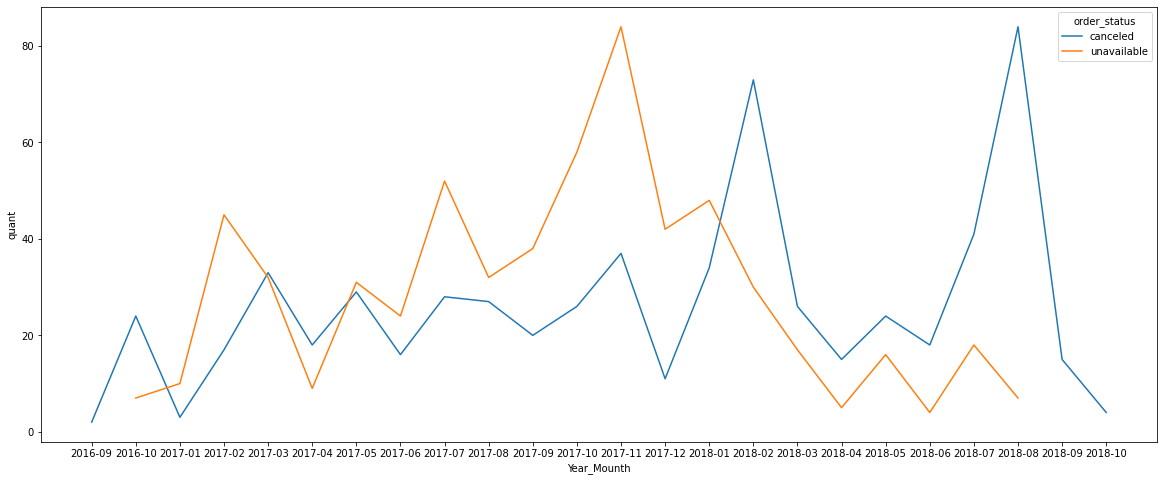

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=no_purchase_by_mounth, x='Year_Mounth', y='quant', hue = 'order_status') # график недоставленных заказов по месяцам

По графику видно, что пик недоступности пришёлся на ноябрь 2017, а резкие скачки отмен были в феврале и августе 2018.
Недоступность заказа связана, по всей видимости, с логистикой поставщика, и выявить точные причины скачков без дополнительных данных мы не сможем. Отмены же могут быть связаны со слишком долгим сроком доставки. Это можно проверить.

In [28]:
no_purchase['delivery_time'] = no_purchase.order_estimated_delivery_date - no_purchase.order_purchase_timestamp # создадим колонку с временем доставки
no_purchase.delivery_time = no_purchase.delivery_time.dt.days

C:\Users\Vaanry\AppData\Local\Temp\ipykernel_10992\4031317086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_purchase['delivery_time'] = no_purchase.order_estimated_delivery_date - no_purchase.order_purchase_timestamp # создадим колонку с временем доставки
C:\Users\Vaanry\AppData\Local\Temp\ipykernel_10992\4031317086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_purchase.delivery_time = no_purchase.delivery_time.dt.days


In [29]:
delivery_mean = no_purchase.groupby(['Year_Mounth'], as_index = False).agg({'delivery_time' :'mean'})

<AxesSubplot:xlabel='Year_Mounth', ylabel='delivery_time'>

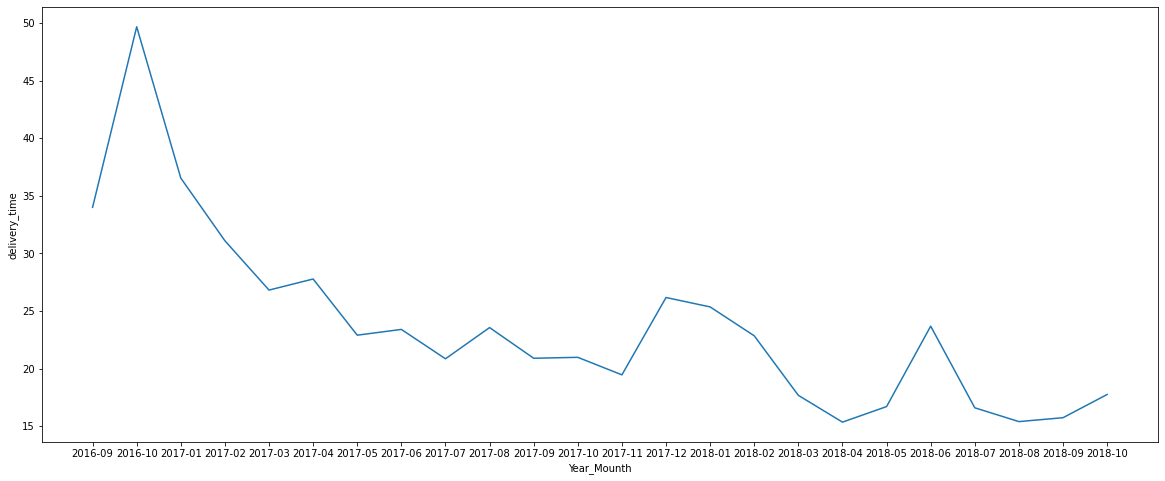

In [30]:
plt.figure(figsize=(20,8))
sns.lineplot(data=delivery_mean, x='Year_Mounth', y='delivery_time')

Очевидно, график изменения ожидаемого времени доставки не слишком похож на график кол-ва отмен. Однако видно, что в ноябре 2017
ожидаемое время доставки начало увеличиваться, и вслед за этим в декабре 2017 график кол-ва отмен также пополз вверх.
График отмен проходит через пик в начале 2018 с некоторым запозданием от графика времени доставки. Схожая картина со вторым пиком: график ожидаемого времени доставки идёт вверх в апреле и (особенно) в мае, а кол-во отмен сначала немного увеличивается
в апреле, а затем наблюдается резкий скачок в июне, с некоторым запозданием от времени доставки (что логично). Так в качестве
причины увеличениякол-ва отмен в 2017 и 2018 можно предположить увеличение ожидаемого времени доставки.

#======Задача 3=======

In [33]:
purchase_products = purchase.merge(items[['order_id','product_id']], on = 'order_id') # добавляем в таблицу столбец с идентификатором товара

In [34]:
purchase_products['Weekday'] = purchase_products.order_purchase_timestamp.dt.strftime('%a') # добавляем день недели

In [35]:
products_weekday = purchase_products.groupby(['product_id', 'Weekday'], as_index = False).agg({'order_id':'count'}).pivot(index='product_id', columns='Weekday', values='order_id').fillna(0).idxmax(axis = 1).to_frame().reset_index()
products_weekday = products_weekday.rename(columns={0:'Weekday'})
products_weekday
#Задание 3: таблица с указанием дней недели, в которые чаще всего данный товар покупается

,product_id,Weekday
0,00066f42aeeb9f3007548bb9d3f33c38,Sun
1,00088930e925c41fd95ebfe695fd2655,Tue
2,0009406fd7479715e4bef61dd91f2462,Thu
3,000b8f95fcb9e0096488278317764d19,Fri
4,000d9be29b5207b54e86aa1b1ac54872,Tue
...,...,...
32721,fff6177642830a9a94a0f2cba5e476d1,Sat
32722,fff81cc3158d2725c0655ab9ba0f712c,Mon
32723,fff9553ac224cec9d15d49f5a263411f,Fri
32724,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tue


======Задача 4=======

In [37]:
purchase['Year_Mounth'] = purchase.order_purchase_timestamp.dt.to_period('M')# создание колонки с годом и месяцем заказа для удобства группировки и подсчётов по месяцам

In [38]:
purchase_mounth = purchase.groupby(['customer_unique_id', 'Year_Mounth'], as_index = False).agg({'order_id' : 'count'}) 
purchase_mounth = purchase_mounth.rename(columns={'order_id' :'mounth_sum'})
# кол-во заказов в месяц у каждого пользователя

In [39]:
purchase_mounth['Days'] = purchase_mounth.Year_Mounth.dt.daysinmonth #создание колонки с количеством дней в текущем месяце
purchase_mounth['Weeks_quant'] = purchase_mounth.Days / 7 # создание колонки с кол-вом недель в текущем месяце, 
# т.к. в каждой неделе 7 дней, следовательно, чтобы получить кол-во недель - нужно кол-во дней разделить на 7

In [40]:
purchase_mounth['Week_mean'] = purchase_mounth.mounth_sum / purchase_mounth.Weeks_quant
purchase_mounth
# Задание 4: Week_mean - искомое среднее кол-во заказов в неделю на пользователя с разбивкой по месяцам. Цифры очень маленькие,
# т.к. подавляющее большинство пользователей совершили покупку только 1 раз. Возможно, в данном случае эта метрика не имеет смысла.

,customer_unique_id,Year_Mounth,mounth_sum,Days,Weeks_quant,Week_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,31,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,31,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,31,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,31,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,30,4.285714,0.233333
...,...,...,...,...,...,...
96845,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1,30,4.285714,0.233333
96846,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1,31,4.428571,0.225806
96847,ffff371b4d645b6ecea244b27531430a,2017-02,1,28,4.000000,0.250000
96848,ffff5962728ec6157033ef9805bacc48,2018-05,1,31,4.428571,0.225806


C:\Users\Vaanry\AppData\Local\Temp\ipykernel_10992\635483471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_mounth_plot.Year_Mounth = purchase_mounth_plot.Year_Mounth.dt.strftime('%Y-%m')


<AxesSubplot:xlabel='Year_Mounth', ylabel='Week_mean'>

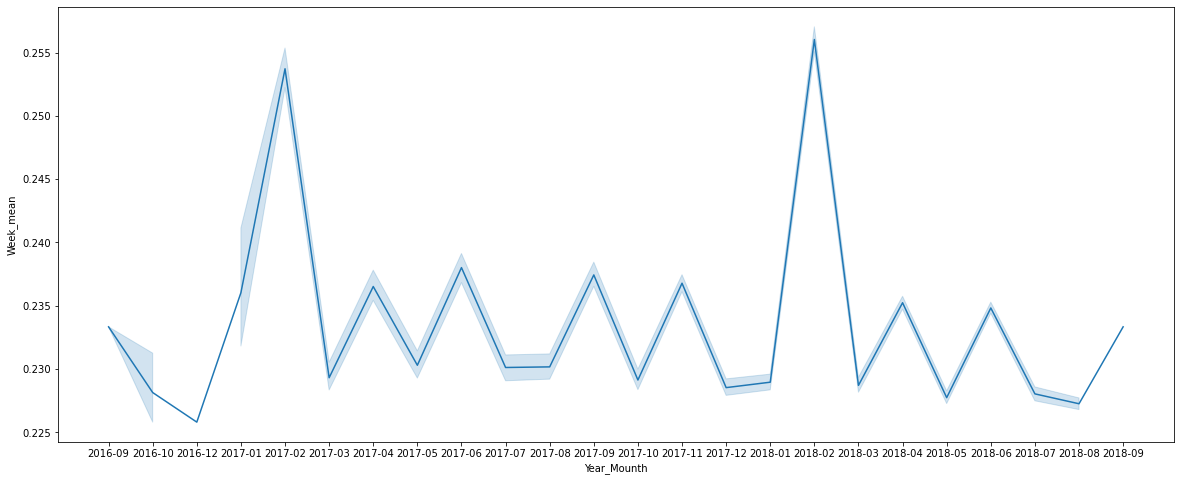

In [41]:
plt.figure(figsize=(20,8))
purchase_mounth_plot = purchase_mounth[['Year_Mounth', 'Week_mean']]
purchase_mounth_plot.Year_Mounth = purchase_mounth_plot.Year_Mounth.dt.strftime('%Y-%m')
purchase_mounth_plot = purchase_mounth_plot.sort_values('Year_Mounth')
sns.lineplot(data = purchase_mounth_plot,  x = 'Year_Mounth', y = 'Week_mean')
#График изменения среднего кол-ва покупок в неделю по месяцам

В течении 2х лет пики недельного кол-ва продаж приходились на февраль. Возможно, это связано с какими-то сезонными событиями
(например, февральские праздники).

Возможно, больше смысла будет в данных по клиентам, которые совершили более 1 покупки. Для этого уберём из дф клиентов,
которые что-то купили только 1 раз, и повторим анализ на них.

In [44]:
mask_cust = purchase.groupby('customer_unique_id', as_index=False).agg({'order_id' : 'count'})\
.query('order_id == 1').customer_unique_id.tolist() # используя код из 1 задания, создадим список для фильтрации

In [45]:
purchase_no_one = purchase.query('customer_unique_id not in @mask_cust') # уберём из дт строки с данными клиентами

In [46]:
purchase_no_one.shape # в итоге получим сильно сокращённый дф

(6101, 10)

In [47]:
purchase_mounth_no_one = purchase_no_one.groupby(['customer_unique_id', 'Year_Mounth'], as_index = False).agg({'order_id' : 'count'}) 
purchase_mounth_no_one = purchase_mounth_no_one.rename(columns={'order_id' :'mounth_sum'})
purchase_mounth_no_one['Days'] = purchase_mounth_no_one.Year_Mounth.dt.daysinmonth 
purchase_mounth_no_one['Weeks_quant'] = purchase_mounth_no_one.Days / 7
purchase_mounth_no_one['Week_mean'] = purchase_mounth_no_one.mounth_sum / purchase_mounth_no_one.Weeks_quant
purchase_mounth_no_one

,customer_unique_id,Year_Mounth,mounth_sum,Days,Weeks_quant,Week_mean
0,004288347e5e88a27ded2bb23747066c,2017-07,1,31,4.428571,0.225806
1,004288347e5e88a27ded2bb23747066c,2018-01,1,31,4.428571,0.225806
2,004b45ec5c64187465168251cd1c9c2f,2017-09,1,30,4.285714,0.233333
3,004b45ec5c64187465168251cd1c9c2f,2018-05,1,31,4.428571,0.225806
4,00a39521eb40f7012db50455bf083460,2018-05,1,31,4.428571,0.225806
...,...,...,...,...,...,...
4758,ff8892f7c26aa0446da53d01b18df463,2017-11,1,30,4.285714,0.233333
4759,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-02,1,28,4.000000,0.250000
4760,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-08,1,31,4.428571,0.225806
4761,ff922bdd6bafcdf99cb90d7f39cea5b3,2017-09,1,30,4.285714,0.233333


C:\Users\Vaanry\AppData\Local\Temp\ipykernel_10992\2087439797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_mounth_no_one_plot.Year_Mounth = purchase_mounth_no_one_plot.Year_Mounth.dt.strftime('%Y-%m')


<AxesSubplot:xlabel='Year_Mounth', ylabel='Week_mean'>

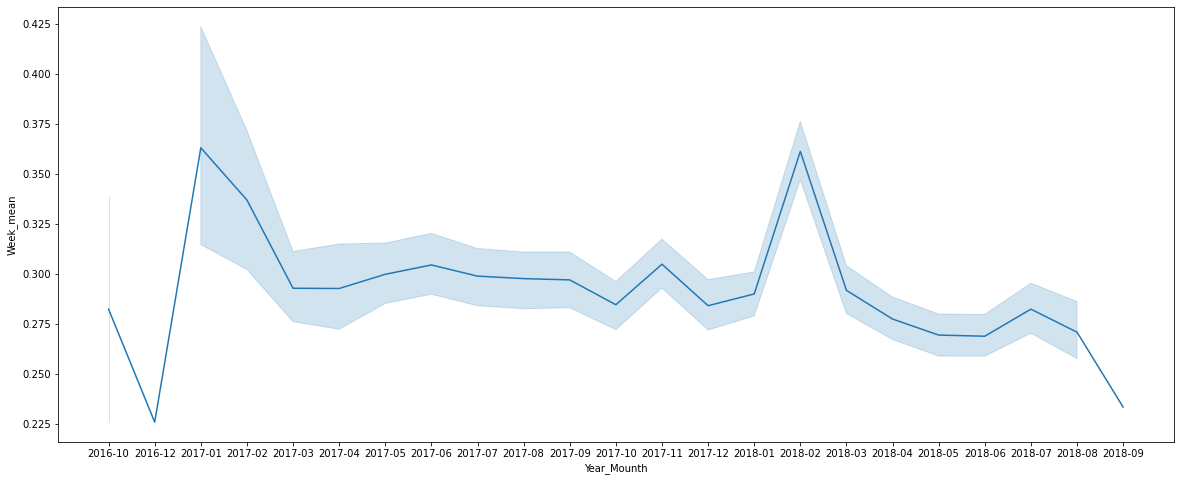

In [48]:
plt.figure(figsize=(20,8))
purchase_mounth_no_one_plot = purchase_mounth_no_one[['Year_Mounth', 'Week_mean']]
purchase_mounth_no_one_plot.Year_Mounth = purchase_mounth_no_one_plot.Year_Mounth.dt.strftime('%Y-%m')
purchase_mounth_no_one_plot = purchase_mounth_no_one_plot.sort_values('Year_Mounth')
sns.lineplot(data = purchase_mounth_no_one_plot,  x = 'Year_Mounth', y = 'Week_mean')

Несмотря на то, что из данных убрали пользователей, которые совершили только одну покупку, принципиально это на данные не повлияло,и метрика всё равно не превысила даже отметку в 0.5. Однако, график получился гораздо более сглаженным, хотя основные пики остались на примерно тех же местах.

======Задача 5=======

In [51]:
mask = (purchase['order_purchase_timestamp'] > '2017-01-01 00:00:00') & (purchase['order_purchase_timestamp'] <= '2018-02-28 23:59:59')
#создание маски для фильтрации датафрейма по датам за 2017 г. Но поскольку нас интересует retention на 3й месяц,
#то в итоговый датафрейм также нужно включить данные за первые 2 месяца 2018 г, т.к. в них содержится информация по заказам
#пользователей, впервые совершивших покупку в ноябре-декабре 2017 г.

In [52]:
purchase_2017 = purchase.loc[mask] #применение маски и фильтрация датафрейма

In [53]:
first_orders = purchase_2017.groupby('customer_unique_id', as_index=False).agg({'Year_Mounth': 'min'}).rename(columns={'Year_Mounth' : 'first_orders'})
first_orders.head() #ищем дату первой покупки для каждого пользователя

,customer_unique_id,first_orders
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


In [54]:
purchase_2017 = purchase_2017.merge(first_orders, how='inner', on='customer_unique_id') #добавляем в дф колонку с датой первого заказа

In [55]:
cohorts = purchase_2017.groupby('first_orders', as_index=False).agg({'customer_unique_id' : 'count'})\
.rename(columns={'first_orders':'cohorts', 'customer_unique_id':'customer_first_mounth'}) 
cohorts
# Пользователей разбиваем на когорты по месяцам, в которые они совершили первую покупку. 
# Поскольку подавляющее большинство пользователей совершили только 1 покупку, и среднее кол-во покупок в неделю очень небольшое,
# то дробить их на более мелкие когорты (по неделям или по дням), скорее всего, не имеет смысла, т.к. тогда у части когорт может
# вообще не быть retention (например, потому что пользователи, купившие товар в какой-то день, не совершат повторную покупку ровно
# через 3 месяца). С делением когорт по месяцам есть больше шансов, что удастся "поймать" повторную покупку и посчитать метрику.

,cohorts,customer_first_mounth
0,2017-01,812
1,2017-02,1743
2,2017-03,2695
3,2017-04,2429
4,2017-05,3728
5,2017-06,3241
6,2017-07,3976
7,2017-08,4315
8,2017-09,4245
9,2017-10,4513


In [56]:
mounth_3rd_filter = ((purchase_2017['Year_Mounth'].astype(int) - purchase_2017['first_orders'].astype(int)) == 2) 
#найдём заказы, сделанные на 3й месяц после первого (т.е. разница между первым и повтороным заказом 2 месяца), сохраним результат в переменную

In [57]:
purchase_2017_mounth_3rd = purchase_2017[mounth_3rd_filter] #отберём заказы, повторённые пользователями на 3й месяц
purchase_2017_mounth_3rd.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,Year_Mounth,first_orders
218,e0f9660f398f606fc4326973728ad4cd,c88ab5ea9550d93be4e31243c7c8b7a2,delivered,2018-01-24 21:57:44,2018-01-25 07:14:17,2018-01-29 18:28:33,2018-02-02 23:36:38,2018-02-21,37d2d1ac62901f9a36cff32ca86c9337,2018-01,2017-11
252,b0ff8ff92f8d916fa2e8005cd8e1a135,610a4163b8ab832daf93b4fbb48e9119,delivered,2017-11-19 16:12:34,2017-11-22 02:58:38,2017-11-22 14:47:28,2017-11-24 20:32:37,2017-12-07,95cfb39a7e263160308a934e42cfc4e0,2017-11,2017-09
463,c1f0e475378c6500b5907a2134bda1da,5da0ca7784ca3dee567abe4c07800952,delivered,2017-10-18 15:53:45,2017-10-18 16:07:43,2017-10-19 19:25:50,2017-10-26 18:30:45,2017-11-10,0a609db8d244100909a15d65eadf8539,2017-10,2017-08
465,66f60a049e91f3849e5f8f328ccca54f,e6118b3f931172e65d7768368620eeee,delivered,2017-10-18 15:53:47,2017-10-18 16:07:54,2017-10-19 12:54:09,2017-10-21 13:02:25,2017-11-07,0a609db8d244100909a15d65eadf8539,2017-10,2017-08
533,a3bb82a765bf828134959a50bdc5f8cc,f4fe2dbe94714c74fce3fa1bd21b5e03,delivered,2017-09-28 10:32:57,2017-09-28 10:50:29,2017-09-29 19:28:57,2017-10-02 18:12:35,2017-10-16,39104edef5e46d7b8c61848cc95e6d97,2017-09,2017-07


In [58]:
repeated_orders = purchase_2017_mounth_3rd.groupby(['first_orders', 'Year_Mounth'], as_index=False).agg({'customer_unique_id' : 'count'})\
.rename(columns={'first_orders':'cohorts', 'Year_Mounth' :'repeated_order', 'customer_unique_id':'customer_3rd_mounth'})
repeated_orders
#получаем количество пользователей из каждой когорты, которые повторили заказ на 3й месяц

,cohorts,repeated_order,customer_3rd_mounth
0,2017-01,2017-03,2
1,2017-02,2017-04,5
2,2017-03,2017-05,9
3,2017-04,2017-06,6
4,2017-05,2017-07,18
5,2017-06,2017-08,12
6,2017-07,2017-09,13
7,2017-08,2017-10,16
8,2017-09,2017-11,22
9,2017-10,2017-12,11


In [59]:
cohorts = cohorts.merge(repeated_orders, how='inner', on='cohorts')
cohorts #получаем таблицу с когортами, в которых отображено кол-во пользователей, совершивших покупку на 3й месяц. 
#первые 2 месяца 2018г отсеялись из числа когорт, т.к. в этих месяцах нас интересуют только повторные покупки.

,cohorts,customer_first_mounth,repeated_order,customer_3rd_mounth
0,2017-01,812,2017-03,2
1,2017-02,1743,2017-04,5
2,2017-03,2695,2017-05,9
3,2017-04,2429,2017-06,6
4,2017-05,3728,2017-07,18
5,2017-06,3241,2017-08,12
6,2017-07,3976,2017-09,13
7,2017-08,4315,2017-10,16
8,2017-09,4245,2017-11,22
9,2017-10,4513,2017-12,11


In [60]:
cohorts['retention'] = cohorts.customer_3rd_mounth / cohorts.customer_first_mounth * 100

In [61]:
cohorts

,cohorts,customer_first_mounth,repeated_order,customer_3rd_mounth,retention
0,2017-01,812,2017-03,2,0.246305
1,2017-02,1743,2017-04,5,0.286862
2,2017-03,2695,2017-05,9,0.333952
3,2017-04,2429,2017-06,6,0.247015
4,2017-05,3728,2017-07,18,0.482833
5,2017-06,3241,2017-08,12,0.370256
6,2017-07,3976,2017-09,13,0.326962
7,2017-08,4315,2017-10,16,0.370800
8,2017-09,4245,2017-11,22,0.518257
9,2017-10,4513,2017-12,11,0.243740


In [63]:
max_retention_year = cohorts.cohorts.iloc[cohorts.retention.idxmax()].strftime('%Y')
max_retention_mounth = cohorts.cohorts.iloc[cohorts.retention.idxmax()].strftime('%B')
max_retention_message = 'Максимальный показатель Retention на 3й месяц у когорты, совершившей первую покупку в {} {} года.'
print(max_retention_message.format(max_retention_mounth, max_retention_year))
#Задача 5 

Максимальный показатель Retention на 3й месяц у когорты, совершившей первую покупку в September 2017 года.


C:\Users\Vaanry\AppData\Local\Temp\ipykernel_10992\4118822427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohorts_plot.cohorts = cohorts_plot.cohorts.dt.strftime('%Y-%m')


<AxesSubplot:xlabel='cohorts', ylabel='retention'>

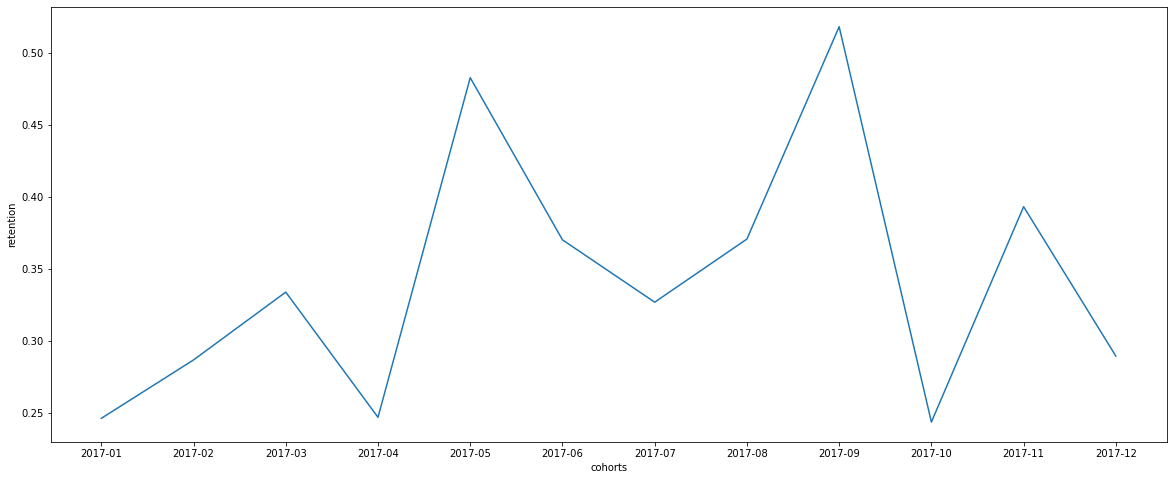

In [64]:
plt.figure(figsize=(20,8))
cohorts_plot = cohorts[['cohorts', 'retention']]
cohorts_plot.cohorts = cohorts_plot.cohorts.dt.strftime('%Y-%m')
sns.lineplot(data = cohorts_plot,  x = 'cohorts', y = 'retention')
#График изменения Retention в течении 2017 года.

In [65]:
#======Задача 6=======

In [66]:
items.groupby(['order_id', 'product_id'], as_index = False).agg({'order_item_id' : 'count'}).sort_values('order_item_id', ascending = False).head()
#Из этой таблицы видно, что одинаковые товары в одном заказе могут повторяться до 20 раз. Таким образом, количество купленных
#товарных позиций отображено не в специальной колонке с количеством (как чаще делается в чеках), а в отдельных строках.
#Следовательно, чтобы посчитать общую сумму заказа, нужно просто просуммировать цену единиц товара по всем позициям в заказе.

,order_id,product_id,order_item_id
10850,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,20
68186,ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,20
26550,428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,15
63242,9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,15
46268,73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,14


In [67]:
orders_sum = items.groupby('order_id', as_index = False).agg({'price' : 'sum'}).rename(columns = {'price' : 'sum'}) #считаем сумму каждого заказа
orders_sum.head()

,order_id,sum
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [68]:
purchase = purchase.merge(orders_sum, how='inner', on = 'order_id') #добавляем к датафрейму с заказами колонку с суммой заказов

In [69]:
from datetime import timedelta
purchase['Now'] = purchase['order_purchase_timestamp'].max() + timedelta(days=1)
#поскольку датасет включает данные максимум 2018 г, а сейчас 2022 г, то для удобства отображения данных и построения кластеров
#в качестве "сегодня" взята не текущая дата, а использован приём как в описании подхода по ссылке в задании.

In [70]:
purchase['DaysSinceOrder'] = purchase.Now - purchase.order_purchase_timestamp #добавляем колонку с разницей между датой заказа и "сегодня"

In [71]:
RFM = purchase.groupby('customer_unique_id', as_index = False).agg({'DaysSinceOrder':'min', 'order_id' : 'count', 'sum' :'sum'})\
.rename(columns = {'DaysSinceOrder' : 'Recency', 'order_id' : 'Frequency', 'sum' : 'Monetary'})
RFM.head()
#считаем показатели RFM для каждого пользователя

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116 days 22:10:30,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119 days 21:55:30,1,18.90
2,0000f46a3911fa3c0805444483337064,542 days 12:01:54,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326 days 12:37:16,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293 days 13:21:15,1,180.00


In [72]:
RFM.Recency = RFM.Recency.dt.days #переводим колонку Recency в более удобный формат

In [73]:
RFM.sort_values('Recency')

,customer_unique_id,Recency,Frequency,Monetary
94635,ff22e30958c13ffe219db7d711e8f564,1,2,290.00
67201,b4dcade04bc548b7e3b0243c801f8c26,5,1,99.00
45383,7a22d14aa3c3599238509ddca4b93b01,5,1,63.90
12648,21dbe8eabd00b34492a939c540e2b1a7,5,1,6.90
47576,7febafa06d9d8f232a900a2937f04338,5,1,45.90
...,...,...,...,...
42988,7390ed59fa1febbfda31a80b4318c8cb,700,1,128.90
52315,8d3a54507421dbd2ce0a1d58046826e0,700,1,119.90
17673,2f64e403852e6893ae37485d5fcacdaf,700,1,21.90
48741,830d5b7aaa3b6f1e9ad63703bec97d23,718,1,134.97


In [2]:
# Cрок давности заказов варьирует от 1 дня до 2х лет.Соответсвенно, можно разделить пользователей на такие кластеры:

# 1: 365-729 days - от года до 2х лет
# 2: 181-365 days - от полугода до года
# 3: 91-180 days - от 3х месяцев до полугода
# 4: 31-90 days - от 1 до 3х месяцев
# 5: 0-30 days - менее 1 месяца

# Такая разбивка чаще всего встречается в различных маркетинговых исследованиях для временного отрезка длительностью более года

In [75]:
def r_score(x):
    if x <= 30:
        return 5
    elif x <= 90:
        return 4
    elif x <= 180:
        return 3
    elif x <= 365:
        return 2
    else:
        return 1

In [76]:
quintiles = RFM[['Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict() #считаем квантили для показателей F и М
quintiles
#однако из-за сильной неравномерности данных квантили распределились так, что не отражают всего диапазона значений показателей.
#поэтому их нельзя использовать для кластеров, ищем другие границы

{'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [77]:
RFM.Frequency.value_counts()

1     92084
2      2650
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: Frequency, dtype: int64

По распределению количества совершённых заказов видно, что пользователи распределены крайне неравномерно. Подавляющее большинство сделали только 1 заказ, на порядок меньше  - 2 заказа, ещё на порядок - 3. Вероятно, логично будет более подбробно выделить кластеры среди пользователей с небольшим количеством заказов.


In [1]:
#1: 1 покупка
#2: 2-3
#3: 4-5
#4: 6-9
#5: 10 и более покупок

In [79]:
def f_score(x):
    if x <= 1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 5:
        return 3
    elif x <= 9:
        return 4
    else:
        return 5   

In [80]:
RFM.sort_values('Monetary') # Посмотрим, какие значения принимает Monetary

,customer_unique_id,Recency,Frequency,Monetary
80251,d80730c15c647bc8f2ad77c908ba5ca9,132,1,0.85
66692,b38211bd797f4fdd81a98b9d1754b606,132,1,0.85
18435,317cfc692e3f86c45c95697c61c853a6,9,1,2.20
70222,bd06ce0e06ad77a7f681f1a4960a3cc6,355,1,2.29
76931,cf3839da0d9492ad151690b65f45d800,214,1,2.99
...,...,...,...,...
25901,459bef486812aa25204be022145caa62,40,1,6729.00
81839,dc4802a71eae9be1dd28f5d788ceb526,568,1,6735.00
43936,763c8b1c9c68a0229c42c9fc6f662b93,50,1,7160.00
81000,da122df9eeddfedc1dc1f5349a1a690c,520,2,7388.00


In [81]:
RFM.Monetary.value_counts().head(20)

59.90     1603
69.90     1493
49.90     1335
89.90     1153
99.90     1128
79.90      939
39.90      904
29.90      896
19.90      865
29.99      825
49.00      785
99.00      751
149.90     700
109.90     660
99.99      637
119.90     606
129.90     531
79.00      513
89.99      488
56.99      486
Name: Monetary, dtype: int64

C:\Users\Vaanry\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

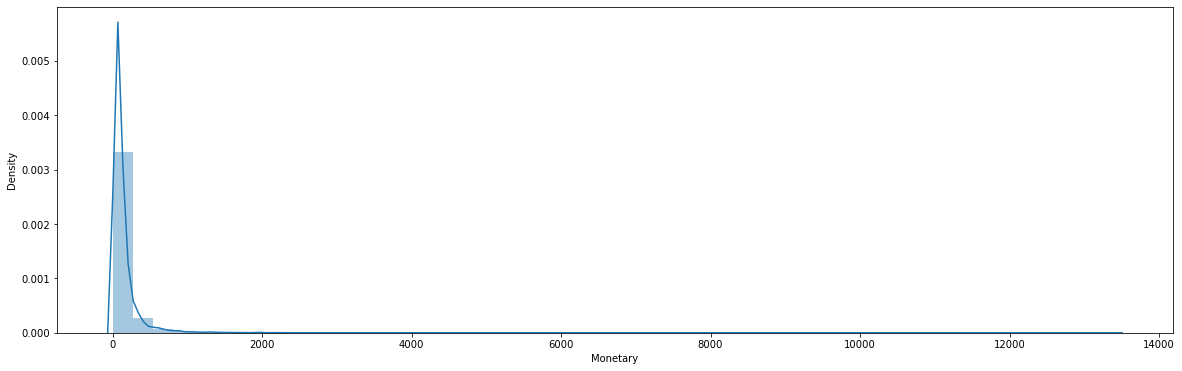

In [82]:
plt.figure(figsize=(20,6)) # Смотрим распределение
sns.distplot(RFM.Monetary)

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

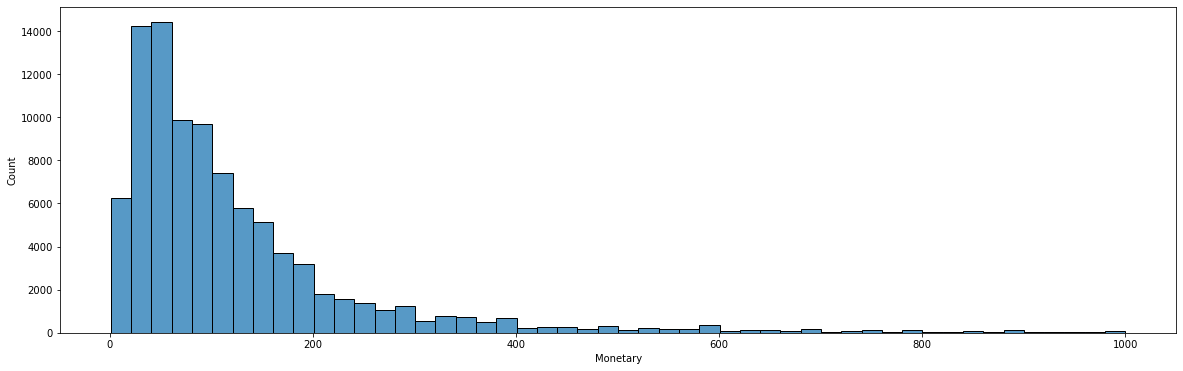

In [83]:
plt.figure(figsize=(20,6)) # Поскольку распределение сильно скошено влево, отбросим часть "правых" значений, чтобы посмотреть детальнее
sns.histplot(RFM.query('Monetary < 1000').Monetary, bins=50, kde = False)

<AxesSubplot:xlabel='Monetary', ylabel='Count'>

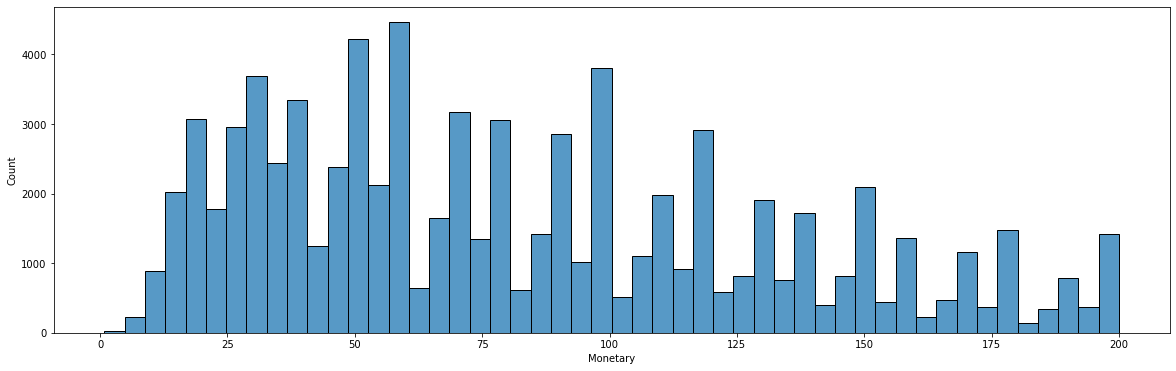

In [84]:
plt.figure(figsize=(20,6)) # Повторим отбрасывание ещё раз
sns.histplot(RFM.query('Monetary < 200').Monetary, bins=50, kde = False)

Видно, что количество заказов не сумму более 1000 очень невелико. Поэтому логичным будет сразу выделить все покупки на сумму 
от 1000 в отдельный кластер 5. Большинство же покупок укладываются в сумму от 19.90 до 59.90. Поэтому этот диапазон также следует выделить в кластер 2.Соответсвенно, сумма до до 19.90 будет кластером 1. Оставшиеся кластеры поделят диапазоны 59.91-200.99 и
201 - 999.
5: 1000.00 и более
4: 201.00 - 999.99
3: 59.91 - 200.99
2: 19.90 - 59.90
1: 0.85 - 19.89

Конечно, с такой разбивкой максимальная детализация приходится на маленькие суммы, но зато оно позволит создать более-менее#равномерные по количеству пользователей кластеры, чем чисто арифметическое разделение максимальной суммы на 5.

In [86]:
def m_score(x):
    if x <= 19.89:
        return 1
    elif x <= 59.90:
        return 2
    elif x <= 200.99:
        return 3
    elif x <= 999.99:
        return 4
    else:
        return 5   

In [87]:
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['Monetary'].apply(lambda x: m_score(x))

In [88]:
RFM['RFM Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,3,113
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,2,212
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,3,213


In [89]:
segt_map = {
    r'[1-2][1-2]': 'потерянные',
    r'[1-2][3-4]': 'в зоне риска',
    r'[1-2]5': 'нельзя потерять',
    r'3[1-2]': 'уходящие',
    r'33': 'требуют внимания',
    r'[3-4][4-5]': 'лояльные',
    r'41': 'растущие',
    r'51': 'новички',
    r'[4-5][2-3]': 'потенциальные лоялисты',
    r'5[4-5]': 'ядро'
}

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,3,1,3,313,уходящие
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311,уходящие
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,3,113,потерянные
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,2,212,потерянные
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,3,213,потерянные


In [90]:
RFM_level_mean = RFM.groupby('Segment', as_index = False).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean', 'customer_unique_id':'count'
}).round(1)\
.rename(columns={'Recency':'RecencyMean','Frequency':'FrequencyMean','Monetary':'MonetaryMean','customer_unique_id' :'Quantity'})
RFM_level_mean 
# Создаём таблицу со средними значениями показателей и количеством пользователей в каждом сегменте

,Segment,RecencyMean,FrequencyMean,MonetaryMean,Quantity
0,в зоне риска,326.6,4.9,544.9,16
1,лояльные,103.0,6.5,622.2,4
2,новички,20.5,1.0,132.7,5273
3,потенциальные лоялисты,48.0,2.1,267.7,590
4,потерянные,340.8,1.0,140.2,57400
5,растущие,59.4,1.0,139.7,11971
6,требуют внимания,134.5,4.4,486.5,11
7,уходящие,137.0,1.0,147.2,19703
8,ядро,13.0,11.0,708.7,2


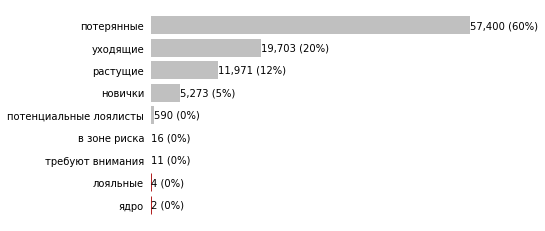

In [91]:
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['ядро', 'лояльные']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Исходя из полученного графика, дела у нас идут очень плохо. Клиентов, которые должны составлять ядро, у нас исчезающе мало.
Подавляющее большинство клиентов - или потерянные, или уходящие. Некоторую надежду внушает относительно большое количество  растущих клиентов, а также новичков. 

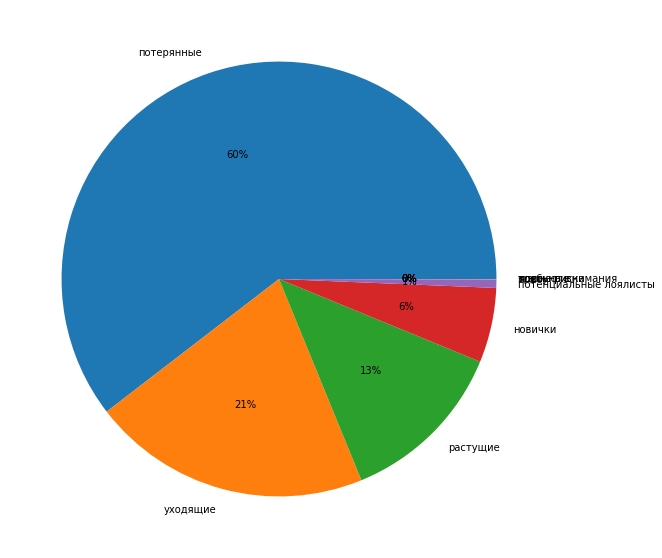

In [93]:
plt.figure(figsize=(10,10)) # Ещё один график. На нём самые маленькие сегменты даже не удаётся различить
plt.pie(RFM.Segment.value_counts(),
        labels=RFM.Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

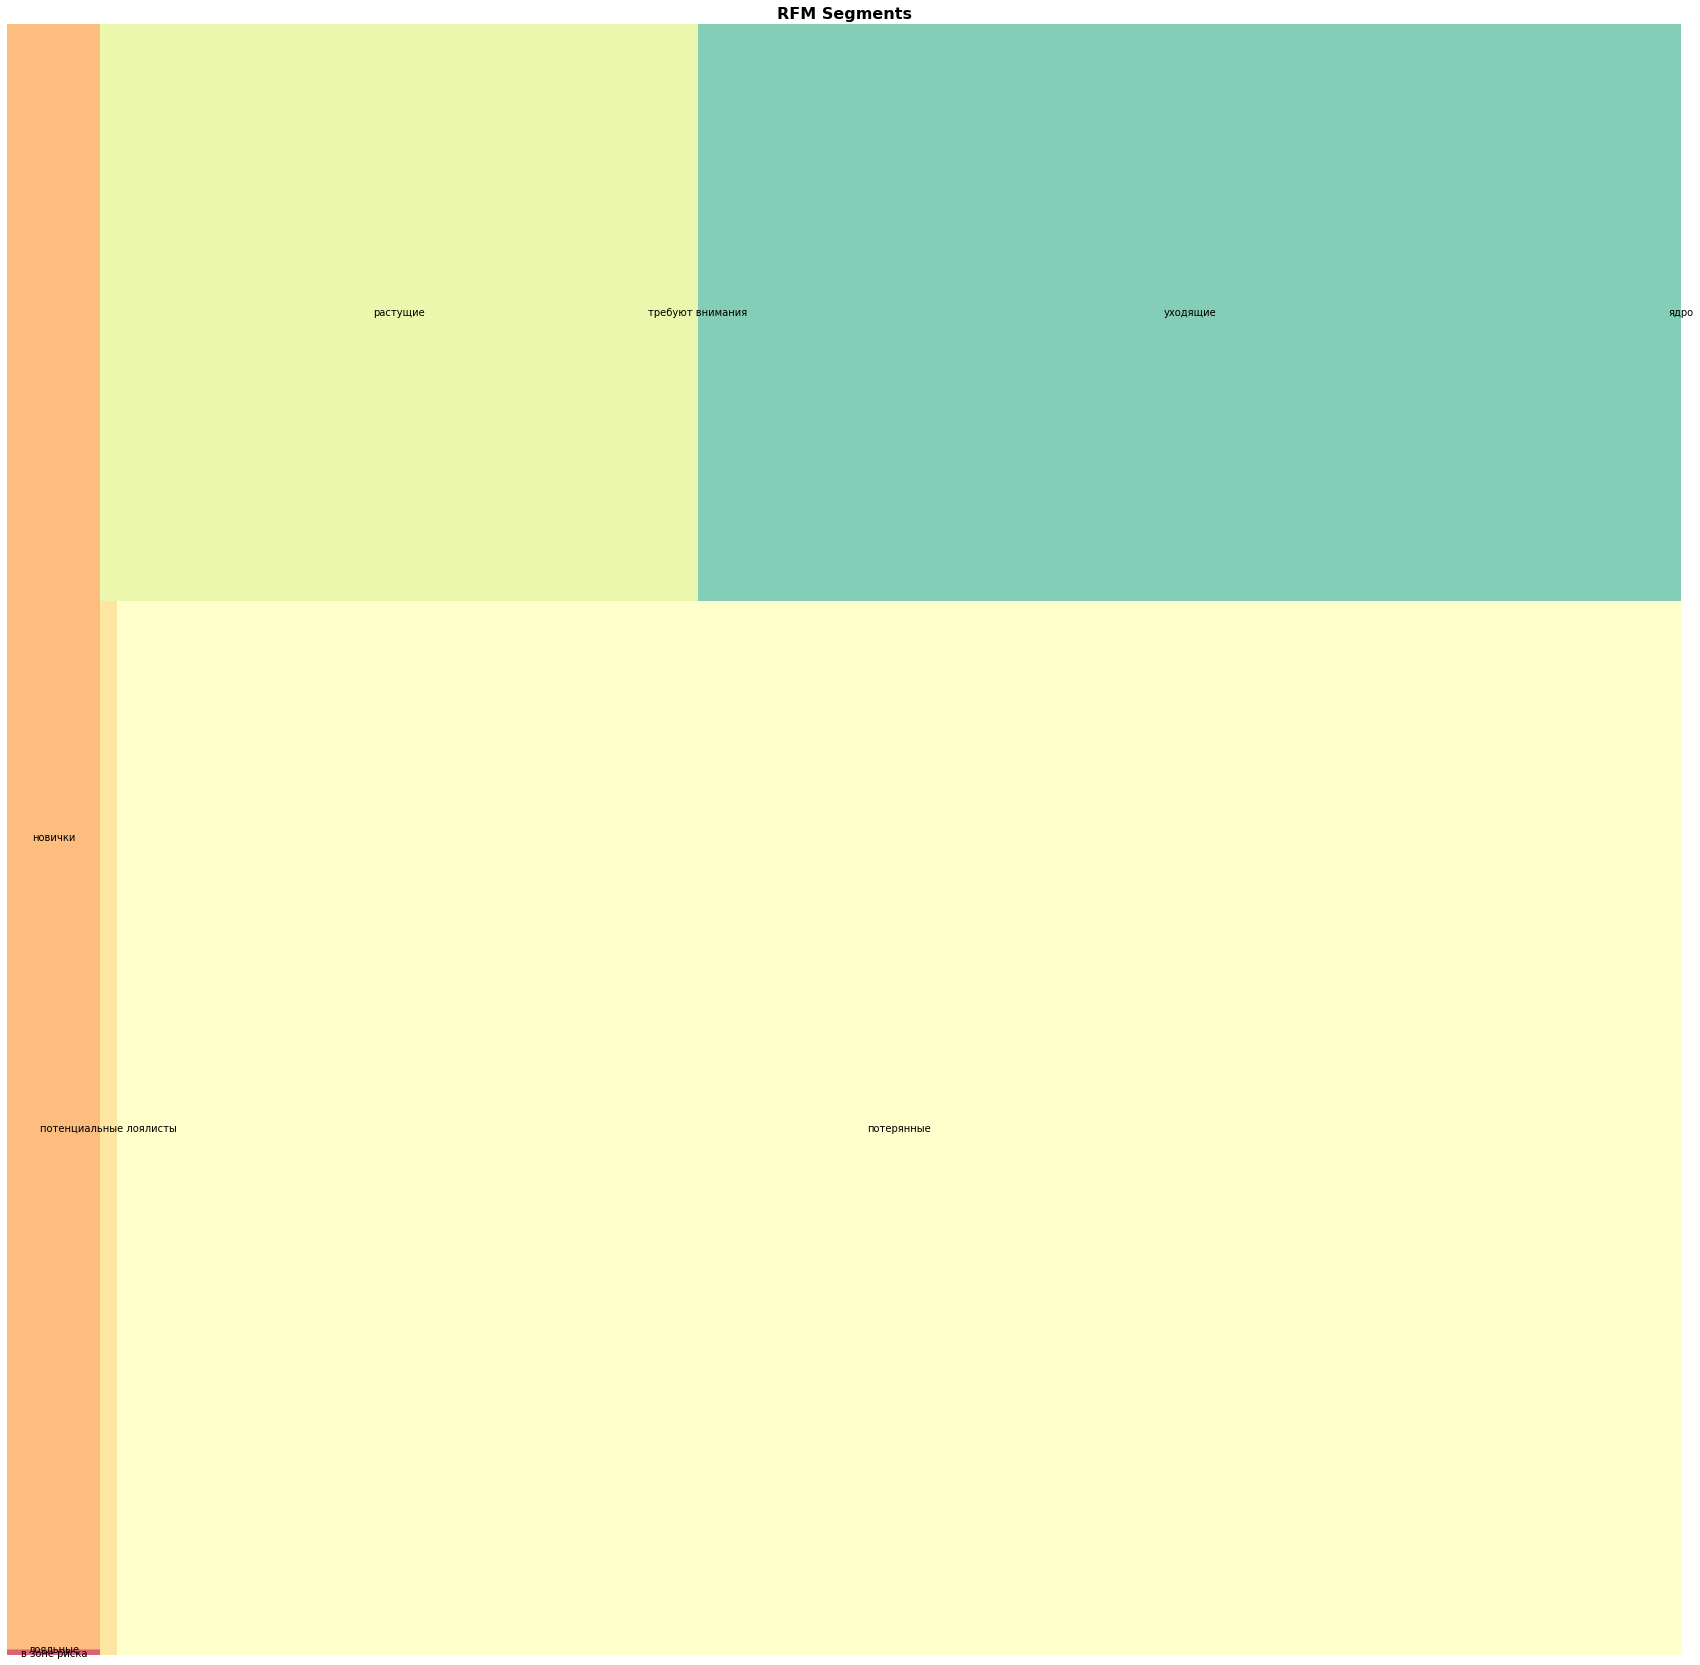

In [116]:
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(30, 30)
squarify.plot(sizes=RFM_level_mean['Quantity'],
              color=sns.color_palette("Spectral", len(RFM_level_mean.Segment)),
              label=RFM_level_mean.Segment,
               alpha=.8 )
plt.title("RFM Segments",fontsize=16,fontweight="bold")

plt.axis('off')
plt.show()

fig.savefig('RFM_Segments.png')